In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sc.set_figure_params(vector_friendly=True)

In [3]:
adata = sc.read('kang_pbmc_integrated.h5ad')

In [4]:
adata.obs.batch_join = adata.obs.batch_join.astype(str)
adata.obs.batch_join[adata.obs.batch_join=='0'] = 'PBMC (reference)'
adata.obs.batch_join[adata.obs.batch_join=='1'] = 'Kang (query)'

adata.obs['condition_joint'] = adata.obs.condition.astype(str)
adata.obs['condition_joint'][adata.obs['condition_joint'].astype(str)=='nan']='control (reference)'
adata.obs['condition_joint'][adata.obs['condition_joint']=='control']='control (query)'
adata.obs['condition_joint'][adata.obs['condition_joint']=='stimulated']='stimulated (query)'

<ipython-input-4-321c23b80d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.batch_join[adata.obs.batch_join=='0'] = 'PBMC (reference)'
<ipython-input-4-321c23b80d5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.batch_join[adata.obs.batch_join=='1'] = 'Kang (query)'
<ipython-input-4-321c23b80d5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['condition_joint'][adata.obs['condition_joint'].astype(

In [5]:
sc.pp.neighbors(adata, use_rep='X_cvae')

In [6]:
sc.tl.umap(adata)

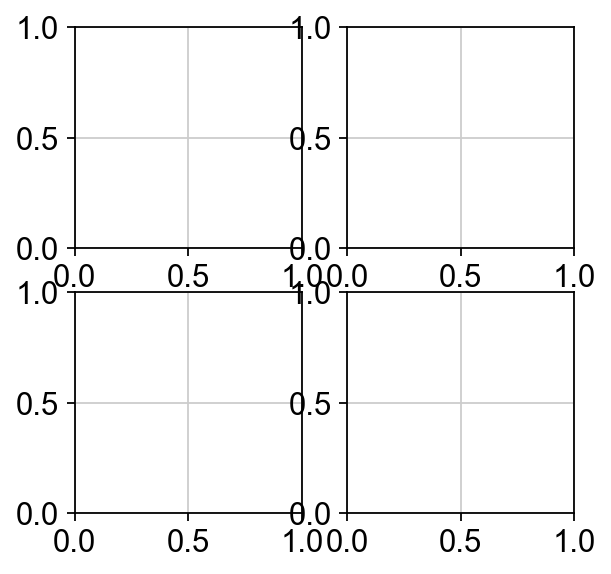

In [7]:
fig, axs = plt.subplots(2, 2)

In [8]:
sc.pl.umap(adata, color='study', 
           legend_fontsize='medium', size=22, frameon=False,
           ax=axs[0,0])

... storing 'batch_join' as categorical
... storing 'condition_joint' as categorical


In [9]:
sc.pl.umap(adata, color='condition_joint', title='Condition',
           legend_fontsize='medium', size=22, frameon=False, palette=['steelblue', 'skyblue', 'red'],
           ax=axs[0,1])

In [10]:
sc.pl.umap(adata, color='cell_type_joint', title='Cell types', 
           legend_fontsize='medium', size=22, frameon=False,
           ax=axs[1,0])

In [11]:
axs[1,1].axis('off')

(0.0, 1.0, 0.0, 1.0)

In [12]:
fig.set_size_inches(20, 14)

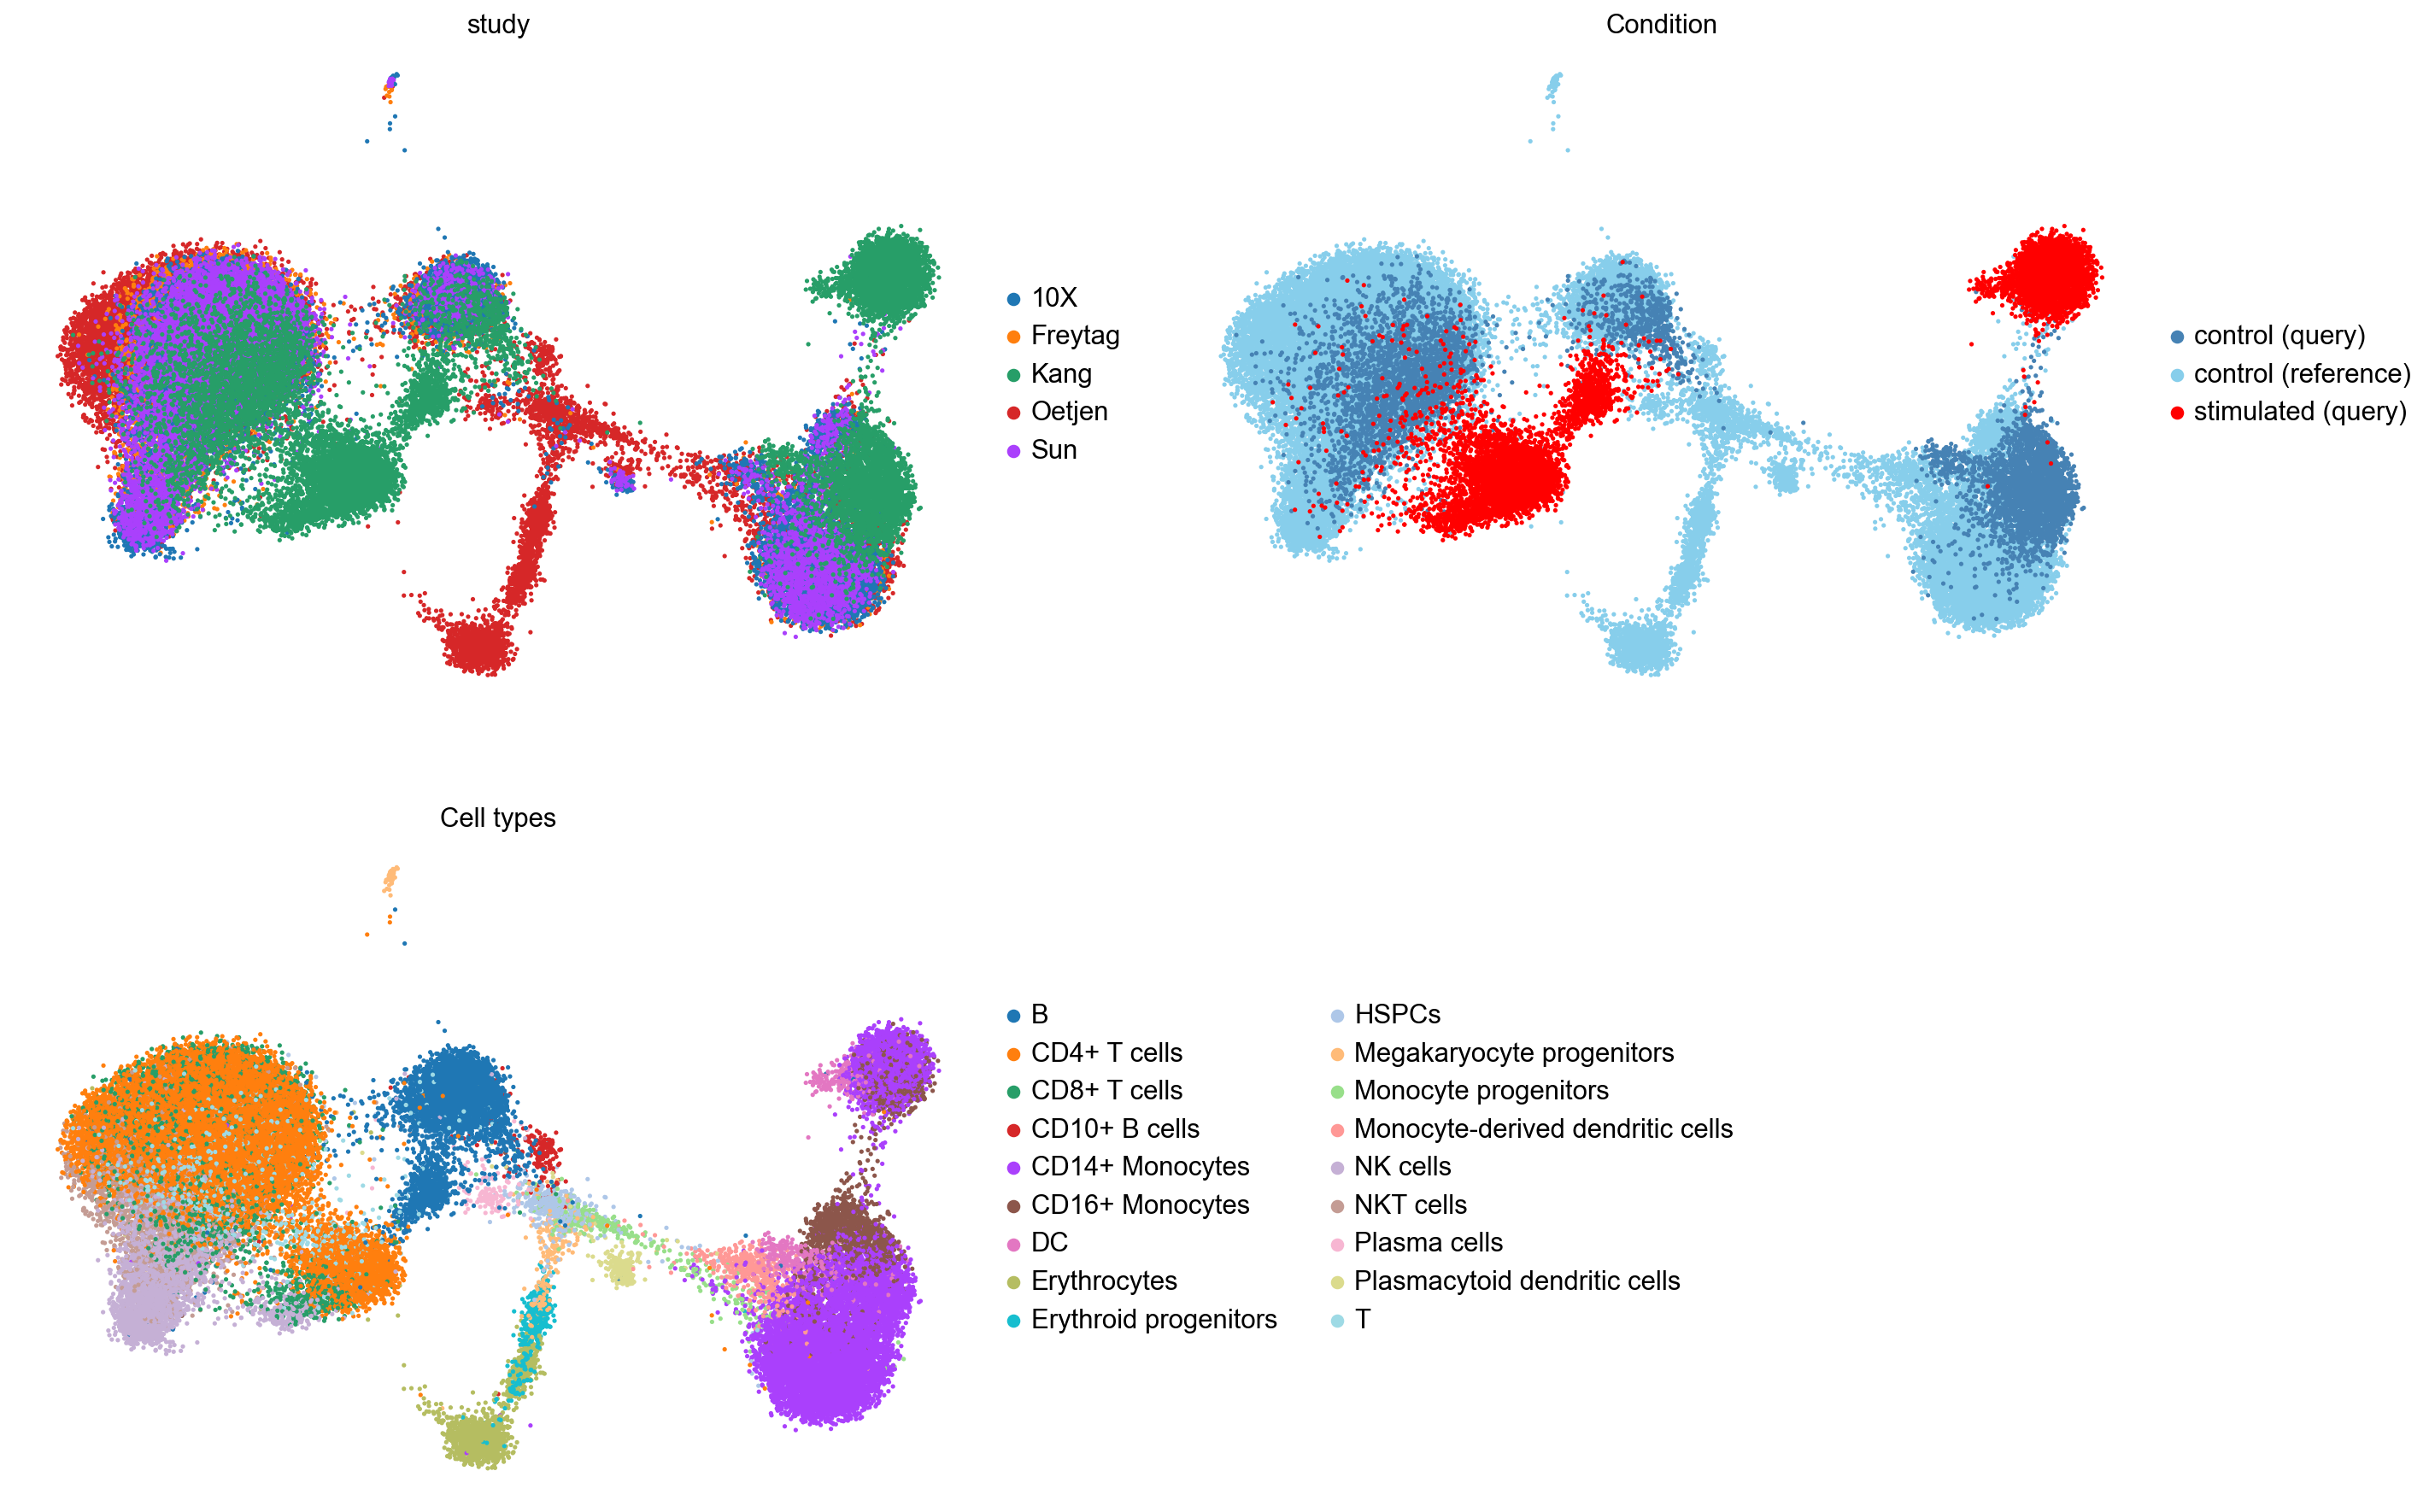

In [13]:
fig

In [14]:
fig.savefig('pbmc_kang_integration_expimap.png', bbox_inches = "tight")